In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/DRREDDY.NS.csv")

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-01,2410.000000,2436.000000,2394.050049,2404.149902,2275.474854,242081
1,2018-01-02,2427.000000,2439.000000,2395.600098,2409.199951,2280.254883,251537
2,2018-01-03,2386.500000,2386.500000,2292.100098,2339.000000,2213.812256,886002
3,2018-01-04,2343.000000,2420.000000,2343.000000,2410.800049,2281.769043,558617
4,2018-01-05,2429.000000,2479.000000,2394.899902,2473.399902,2341.018799,639900
...,...,...,...,...,...,...,...
1231,2022-12-26,4332.049805,4347.000000,4230.049805,4248.600098,4248.600098,318608
1232,2022-12-27,4269.799805,4269.799805,4201.000000,4250.850098,4250.850098,273249
1233,2022-12-28,4250.850098,4266.649902,4215.950195,4252.750000,4252.750000,217601
1234,2022-12-29,4275.000000,4354.649902,4223.049805,4260.600098,4260.600098,812932


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1236 non-null   object 
 1   Open       1236 non-null   float64
 2   High       1236 non-null   float64
 3   Low        1236 non-null   float64
 4   Close      1236 non-null   float64
 5   Adj Close  1236 non-null   float64
 6   Volume     1236 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1236.000000,1236.000000,1236.000000,1236.000000,1236.000000,1.236000e+03
mean,3671.865372,3714.867598,3623.139641,3666.935722,3584.062257,8.610092e+05
std,1066.320362,1073.598539,1053.877068,1061.351637,1069.645313,1.044144e+06
min,1902.500000,1963.449951,1872.949951,1893.050049,1791.730347,2.083600e+04
25%,2627.537476,2660.000000,2592.337463,2624.549988,2533.712585,3.873655e+05
50%,3978.900024,4043.375000,3925.250000,3974.725098,3880.865601,6.066470e+05
75%,4561.099854,4612.862305,4503.787354,4557.625122,4502.337525,9.830960e+05
max,5580.000000,5614.600098,5531.950195,5575.700195,5450.602051,2.198708e+07


In [ ]:
df.Data	= pd.to_datetime(df.Date)
df2 =df.set_index('Date')

<ipython-input-631-9d7ec7e71958>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Data	= pd.to_datetime(df.Date)


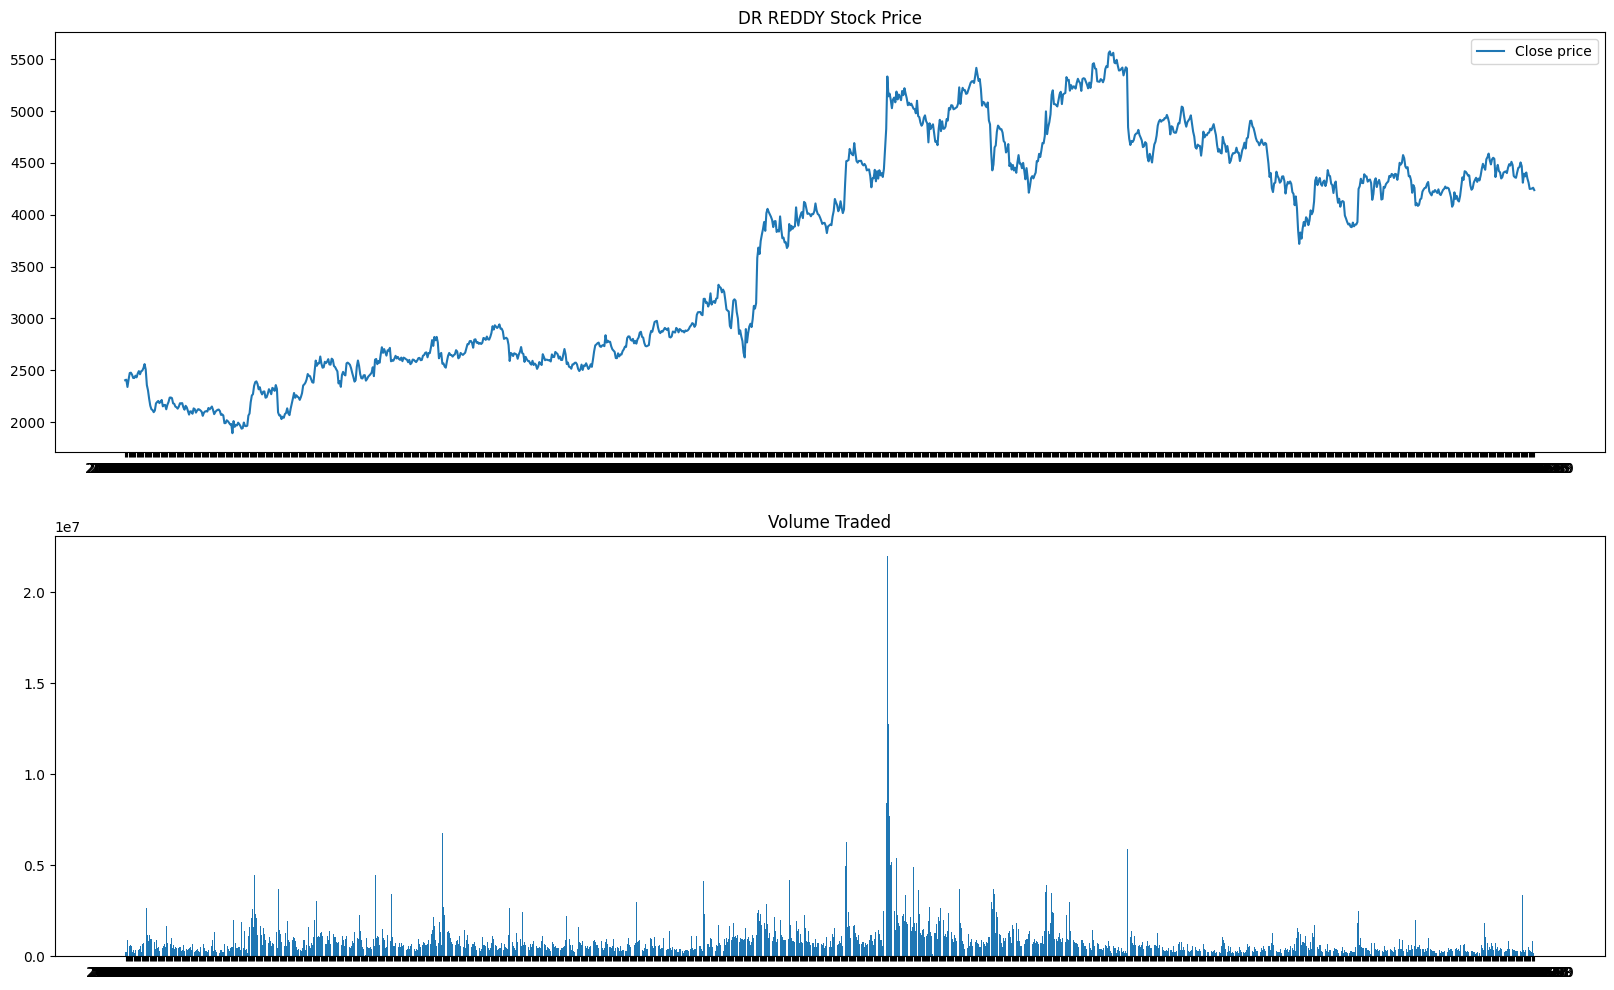

In [ ]:
plt.figure(figsize=(20,12))
plt.subplot(2, 1, 1)
plt.title('DR REDDY Stock Price')
plt.plot(df2.Close,label='Close price')
plt.legend()
plt.subplot(2, 1, 2)
plt.title('Volume Traded')
plt.bar(x=df2.index,height=df2['Volume'])
plt.show()


# ARIMA Model:-


In [ ]:
data = list(df2["Close"])

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data)
print("1. ADF : ",result[0])
print("2. P-Value : ", result[1])
print("3. Num Of Lags : ", result[2])
print("4. Num Of Observations Used For ADF Regression:", result[3])
print("5. Critical Values :")
for key, val in result[4].items():
  print("\t",key, ": ", val)

1. ADF :  -1.3370660617983308
2. P-Value :  0.6120486341747752
3. Num Of Lags :  0
4. Num Of Observations Used For ADF Regression: 1235
5. Critical Values :
	 1% :  -3.4356560275160835
	 5% :  -2.8638831211270817
	 10% :  -2.568017509711682


In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pmdarima.arima.utils import ndiffs
d_value = ndiffs(data,test = "adf")
print("d value:", d_value)

d value: 1


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [ ]:
x_train= data[:-100]
x_test = data[-100:]
print(len(x_train),len(x_test))

1136 100


In [ ]:
stepwise_fit = auto_arima(data,trace=True,suppress_warnings=True)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13820.852, Time=2.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13816.422, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13817.873, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=13817.863, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13815.067, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13817.100, Time=0.81 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.443 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1236
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -6906.534
Date:                Fri, 31 Mar 2023   AIC                          13815.067
Time:                        10:26:42   BIC                          13820.186
Sample:                             0   HQIC                         13816.993
    

In [ ]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(data, order=(3,2,0))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1236
Model:                 ARIMA(3, 2, 0)   Log Likelihood               -7031.039
Date:                Fri, 31 Mar 2023   AIC                          14070.078
Time:                        10:26:43   BIC                          14090.550
Sample:                             0   HQIC                         14077.779
                               - 1236                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7407      0.019    -39.239      0.000      -0.778      -0.704
ar.L2         -0.5118      0.021    -24.120      0.000      -0.553      -0.470
ar.L3         -0.2450      0.020    -12.368      0.000      -0.284      -0.206
sigma2      5203.4570    103.880     50.091      0.000    4999.857    5407.057
===================================================================================
Ljung-Box (L1) (Q):                   2.63   Jarque-Bera (JB):              2156.34
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               2.36   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start=len(x_train)
end=len(x_train)+len(x_test)-1
pred = model.predict(start=start,end=end)
pred

array([4162.0795557 , 4167.75219595, 4259.07746442, 4278.72730489,
       4286.67621696, 4286.49869597, 4316.85453978, 4333.40605766,
       4216.18579229, 4191.6356758 , 4157.91279522, 4203.27238647,
       4215.23640377, 4247.43289587, 4231.52548531, 4206.95333075,
       4252.05664097, 4191.86985421, 4183.05449177, 4214.8628979 ,
       4237.46698424, 4261.13551388, 4292.36660507, 4264.73419591,
       4267.36609827, 4253.20788873, 4199.77325644, 4147.70431414,
       4030.89353025, 4062.27953674, 4215.77427179, 4146.4622139 ,
       4212.11811068, 4146.54853613, 4107.4277828 , 4188.67827471,
       4291.23396246, 4416.02028384, 4386.7248119 , 4481.55342785,
       4447.32191744, 4408.26107977, 4386.52669479, 4370.31202304,
       4248.71003646, 4203.87182919, 4223.50453985, 4293.52139357,
       4347.78943435, 4385.95763651, 4331.77581382, 4359.98130679,
       4328.08352412, 4384.28979267, 4472.86469102, 4526.69811377,
       4491.77475431, 4448.66152387, 4559.2645748 , 4569.52729

In [ ]:
s = pd.Series(pred, index =df2.index[-100:])
s

Date
2022-08-05    4162.079556
2022-08-08    4167.752196
2022-08-10    4259.077464
2022-08-11    4278.727305
2022-08-12    4286.676217
                 ...     
2022-12-26    4290.682212
2022-12-27    4217.392083
2022-12-28    4212.637396
2022-12-29    4227.751536
2022-12-30    4248.515078
Length: 100, dtype: float64

<Axes: xlabel='Date'>

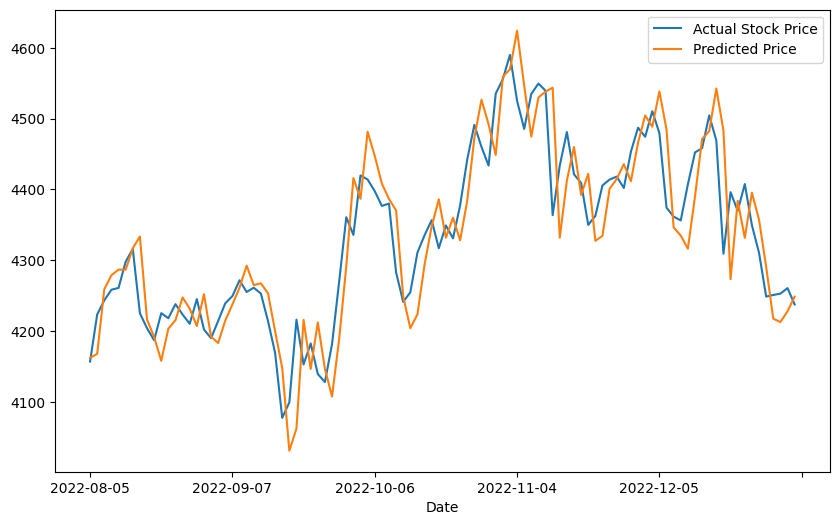

In [ ]:
plt.figure(figsize=(10,6), dpi=100)
df2['Close'][-100:].plot(label='Actual Stock Price', legend=True)
s.plot(label='Predicted Price', legend=True,)

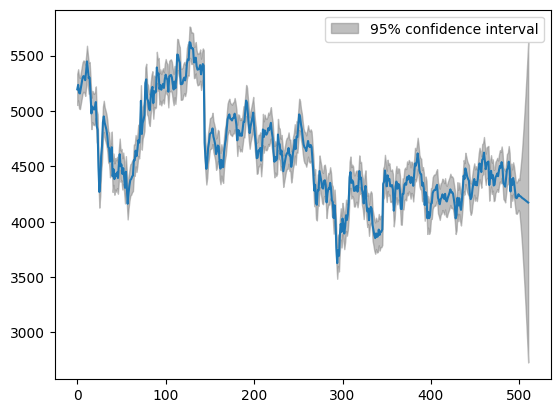

In [ ]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model, start = len(data)-500, end = len(data)+10, dynamic = False);

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(x_test,pred))

57.96006017784267

In [ ]:
from sklearn.metrics import r2_score
r2_score(x_test,pred)

0.7560326283011194

# Predicting Future 10 values:

In [ ]:
pred_future = model.predict(start=end,end=end+30)
pred_future

array([4248.51507817, 4234.42917018, 4230.90238089, 4225.0483067 ,
       4216.24255015, 4210.91382416, 4205.09043458, 4198.57721526,
       4191.97615051, 4185.91441437, 4179.66716721, 4173.30283723,
       4166.98802358, 4160.74190978, 4154.44825469, 4148.14252214,
       4141.85323316, 4135.56959419, 4129.27631377, 4122.98325428,
       4116.69358109, 4110.40364895, 4104.11212142, 4097.82107842,
       4091.53055647, 4085.23979151, 4078.94882116, 4072.65799964,
       4066.36723254, 4060.07639929, 4053.78555072])

In [ ]:
import datetime
start_date = datetime.datetime(2022,12,30)
dates = [start_date + datetime.timedelta(days=idx) for idx in range(31)]

In [ ]:
pred_future2 = pd.Series(pred_future, index = dates)
pred_future2

2022-12-30    4248.515078
2022-12-31    4234.429170
2023-01-01    4230.902381
2023-01-02    4225.048307
2023-01-03    4216.242550
2023-01-04    4210.913824
2023-01-05    4205.090435
2023-01-06    4198.577215
2023-01-07    4191.976151
2023-01-08    4185.914414
2023-01-09    4179.667167
2023-01-10    4173.302837
2023-01-11    4166.988024
2023-01-12    4160.741910
2023-01-13    4154.448255
2023-01-14    4148.142522
2023-01-15    4141.853233
2023-01-16    4135.569594
2023-01-17    4129.276314
2023-01-18    4122.983254
2023-01-19    4116.693581
2023-01-20    4110.403649
2023-01-21    4104.112121
2023-01-22    4097.821078
2023-01-23    4091.530556
2023-01-24    4085.239792
2023-01-25    4078.948821
2023-01-26    4072.658000
2023-01-27    4066.367233
2023-01-28    4060.076399
2023-01-29    4053.785551
dtype: float64